# Optimization exercises

As should be clear there is no silver bullet for optimizing any function. Although convex functions are the theoretically easy case, 
non convex optimization is becoming the classical use case since the advent of deep learning. 
In practice it is important to monitor the optimization process and to be able to understand when the optimization works well, struggles or entirely fails.

**Important Note** some of these exercises are automatically graded. You have to pay attention to:

- Never modify existing function signatures. You may add other functions and testing code if you like. It does not impact grading. 
- Pass the assertion tests found in the notebook. These tests and others you cannot see are used to grade part of your homework
- Pay attention to provide reasonably efficient solutions. Any notebook cell that takes more than 30 seconds at execution is considered as failed.

---
## Exercise 1 

For the function $f(x) = (3x-2)^2$
   1. Plot the function within the interval $[-3,3]$
   2. Compute the first order derivative
   3. Compute the second order derivative
   4. Optimize the function with gradient descent. 
   5. Optimize the function with the newton method 

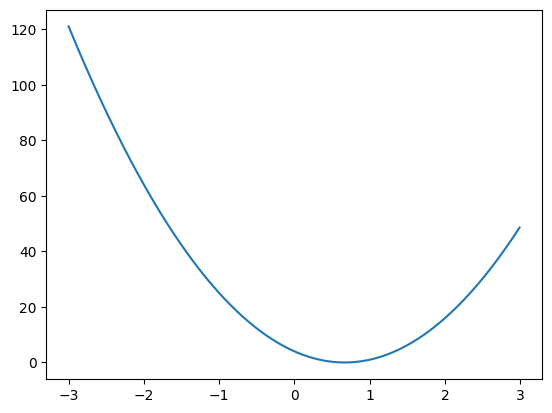

In [4]:
import numpy as np
%matplotlib inline

def fun1(x):
    return (3*x-2)**2

# PLOT SECTION

### BEGIN SOLUTION
import matplotlib.pyplot as plt
x = np.arange(-3,3,0.01)
y = fun1(x)
plt.plot(x,y)
plt.show()
### END SOLUTION

In [5]:
#  *** AUTOGRADING SECTION ***
#
#  !!! FUNCTION SIGNATURES MUST BE LEFT UNCHANGED !!!
#
#  Each of your functions must return a value (@see docstring)

def fprime1(x):
    """
    Args:
        x (float) : the x value
    Returns:
        float. the first order derivative at x
    """
    ### BEGIN SOLUTION 
    return 18*x - 12
    ### END SOLUTION


def fsec1(x):
    """
    Args:
        x (float) : the x value
    Returns:
        float. the second order derivative at x
    """
    ### BEGIN SOLUTION
    return 18
    ### END SOLUTION



# It is strongly advised to output intermediate results during optimisation such as:
#  - the successive values of the iterates.
#  - the successive values of alpha at each iteration in case alpha is non constant in your implementation.
#  - the current distance from the theoretical solution you computed analytically and the current iterate.

################## NOTE #######################################################
# For some exercises it may be useful to use a learning rate scheduler for the newton method: it may help convergence.
# @see https://en.wikipedia.org/wiki/Learning_rate
###############################################################################

def gradient_descent(x0,fprime,alpha0=1.0,decay=0.,epsilon=0.0001):
    """
    Args:
        x0        (float)  : the initial iterate
        fprime(functional) : the first derivative function
        alpha0 (float)     : the initial learning rate
        decay (float)      : scheduler decay 
        epsilon            : the precision of the solution
    Returns:
        float. the value of the last iterate
    """    
    ### BEGIN SOLUTION
    alpha = alpha0
    xprev = x0
    dx    = fprime(x0)
    x     = x0 - alpha * dx
    t     = 1
    while abs(x-xprev) > epsilon:
        xprev = x
        alpha = alpha/(1+decay*t)
        x     = x - alpha * dx
        dx    = fprime(x)
        t    += 1
    return x
    ### END SOLUTION


# It is strongly advised to output intermediate results during optimisation such as:
#  - the successive values of the iterates.
#  - the successive values of alpha at each iteration in case alpha is non constant in your implementation.
#  - the current distance from the theoretical solution you computed and the current iterate.

################## NOTE #######################################################
# For some exercises it may be useful to use a learning rate scheduler for the newton method: it may help convergence.
# @see https://en.wikipedia.org/wiki/Learning_rate
###############################################################################

def newton(x0,fprime,fsec,beta0=1.0,decay=0.0,epsilon=0.000001):
    """
    Args:
        x0        (float)  : the initial iterate
        fprime(functional) : the first derivative function
        fsec(functional)   : the second derivative function
        beta0 (float)      : the initial heuristic learning rate to be used by the scheduler
        decay(float)       : the scheduler decay (like in gradient descent)
        epsilon            : the precision of the solution
    Returns:
        float. the value of the last iterate
    
    """
    ### BEGIN SOLUTION
    xprev     = x0
    dx        = fprime(x0)
    x         = x0 - (1/fsec(x0)) * dx
    t         = 0
    while abs(x-xprev) > epsilon:
        xprev = x
        beta  = beta0 * np.exp(-decay*t)
        alpha = 1/fsec(x)
        x     = x - beta*alpha * dx
        dx    = fprime(x)
        t    += 1.
    return x
    ### END SOLUTION

# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited 
#   for your implementation
#  The autograder uses theses values when calling your optimization functions
hyper1 = {"gradient_descent":{"alpha0": 1.0,'decay':0.00,'epsilon':0.00001},
          "newton"          :{'beta':1.0,'decay':0.00,'epsilon':0.00001}}


    
# ADD ANY OTHER OPTIONAL CODE HERE TO TEST YOUR IMPLEMENTATION/FIND HYPERPARAMETERS
# test against several initial conditions, several learning rates, several epsilon
# test against scipy.optimize.minimize
# it will not be graded





In [6]:
### BEGIN HIDDEN TESTS
hyper1 = {"gradient_descent":{"alpha0": 0.1,'epsilon':0.001,'decay':0.001},
          "newton"          :{'beta0':1.0,'decay':0.0,'epsilon':0.00001}}
### END HIDDEN TESTS
### TEST GRADIENT DESCENT  (2pts)
import math

assert fprime1(1) == 6 

assert  math.isclose(2/3, gradient_descent(10,fprime1,
                          alpha0=hyper1['gradient_descent']['alpha0'],
                          decay=hyper1['gradient_descent']['decay'],
                          epsilon=hyper1['gradient_descent']['epsilon']),abs_tol=0.01) 

### BEGIN HIDDEN TESTS
for x0 in range(-4,5,1):
    assert math.isclose(2/3,gradient_descent(x0,fprime1,
                                                 alpha0=hyper1['gradient_descent']['alpha0'],
                                                 decay=hyper1['gradient_descent']['decay'],
                                                 epsilon=hyper1['gradient_descent']['epsilon']),abs_tol=0.01) 
### END HIDDEN TESTS



In [7]:
### TEST NEWTON (2pts)

assert fsec1(-1)  == 18

assert  math.isclose(2/3, newton(-10,fprime1,fsec1,
                                      beta0=hyper1['newton']['beta0'],
                                      decay=hyper1['newton']['decay'],
                                      epsilon=hyper1['newton']['epsilon']),abs_tol=0.0001) 

### BEGIN HIDDEN TESTS
for x0 in range(-4,5,1):
    assert math.isclose(2/3,newton(x0,fprime1,
                                       fsec1,
                                       beta0=hyper1['newton']['beta0'],
                                       decay=hyper1['newton']['decay'],
                                       epsilon=hyper1['gradient_descent']['epsilon']),abs_tol=0.0001) 
### END HIDDEN TESTS

**Free content and comments section**: 

 - What are the key properties of this function ? is it convex ? How many solutions can you find ? 
 - In case your solution is far from the exact solution can you explain why ? In case both algorithms return different solutions, explain why.
 - How did you tune alpha, epsilon ?
 - ...

---
## Exercise 2

For the function $f(x) = x (x-2) (x+2)^2$
   1. Plot the function within the interval $[-3,3]$
   2. Compute the first order derivative
   3. Compute the second order derivative
   4. Optimize the function with gradient descent. 
   5. Optimize the function with the newton method 

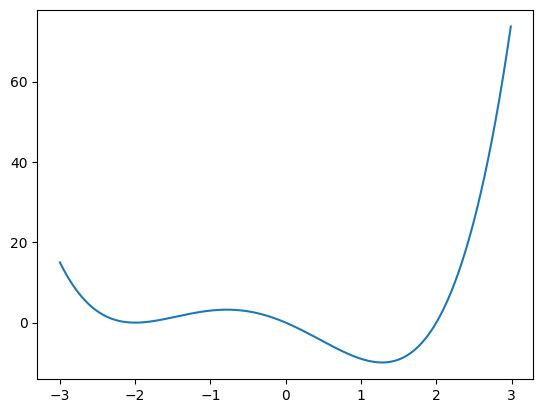

In [15]:
%matplotlib inline

def fun2(x):
    return x * (x-2) * (x+2)**2

# PLOT SECTION

### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-3,3,0.01)
y = fun2(x)
plt.plot(x,y)
plt.show()
### END SOLUTION


In [16]:
#  *** AUTOGRADING SECTION ***
#
#  !!! FUNCTION SIGNATURES MUST BE LEFT UNCHANGED !!!
#
#  Each of your functions must return a value (@see docstring)

def fprime2(x):
    """
    Args:
        x (float) : the x value
    Returns:
        float. the first order derivative at x
    """
    ### BEGIN SOLUTION
    return x*(x - 2)*(2*x + 4) + x*(x + 2)**2 + (x - 2)*(x + 2)**2
    ### END SOLUTION

def fsec2(x):
    """
    Args:
        x (float) : the x value
    Returns:
        float. the second order derivative at x
    """
    ### BEGIN SOLUTION
    return 2*(x*(x - 2) + 2*x*(x + 2) + 2*(x - 2)*(x + 2) + (x + 2)**2)
    ### END SOLUTION
    
# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited for your implementation
#  The autograder uses theses values when calling your optimization functions

hyper2 = {"gradient_descent":{"alpha0": 1.0,'decay':0.,'epsilon':0.00001},
          "newton"          :{'beta0':1.0,'decay':0. ,'epsilon':0.00001}}


# FEEL FREE TO ADD ANY OTHER OPTIONAL CODE HERE TO TEST YOUR IMPLEMENTATION.
# test against several initial conditions, several learning rates, several epsilon
# test against scipy.optimize.minimize
# it will not be graded


In [17]:
### BEGIN HIDDEN TESTS
hyper2 = {"gradient_descent":{"alpha0": 0.0001,'epsilon':0.00001},
          "newton"          :{'epsilon':0.00001}}
### END HIDDEN TESTS
import math

# GRADIENT DESCENT TESTS (2pts)

assert fprime2(1) == -6 

solset = [-2, 1.28077641,-0.7807764064043429]

sol = gradient_descent(10,fprime2,
                          alpha0=hyper2['gradient_descent']['alpha0'],
                          epsilon=hyper2['gradient_descent']['epsilon'])
assert any(math.isclose(s,sol,abs_tol=0.01) for s in solset)


### BEGIN HIDDEN TESTS
xinit  = [-3,-1,1,2]

for x0 in xinit:
    sol = gradient_descent(x0,fprime2,alpha0=hyper2['gradient_descent']['alpha0'],
                                      epsilon=hyper2['gradient_descent']['epsilon'])
    assert any(math.isclose(s,sol,abs_tol=0.01) for s in solset)
### END HIDDEN TESTS



In [18]:
# NEWTON TESTS (2pts)

assert fsec2(-1)  == -8

sol = newton(-10,fprime2,fsec2,epsilon=hyper2['newton']['epsilon']) 
assert any(math.isclose(s,sol,abs_tol=0.01) for s in solset)

### BEGIN HIDDEN TESTS
for x0 in xinit:
    sol = newton(x0,fprime2,fsec2, epsilon=hyper2['gradient_descent']['epsilon']) 
    assert any(math.isclose(s,sol,abs_tol=0.01) for s in solset)
### END HIDDEN TESTS

**Free content and comments section**: 

 - What are the key properties of this function ? is it convex ? How many solutions can you find ? 
 - In case your solution is far from the exact solution can you explain why ? In case both algorithms return different solutions, explain why.
 - How did you tune alpha, epsilon ?
 - ...

---
## Exercise 3

For the function $f(x) = -e^{-(3x-1)^2} + \frac{x^2}{100}$. 
   1. Plot the function within the interval $[-3,3]$
   2. Compute the first order derivative
   3. Compute the second order derivative
   4. Optimize the function with gradient descent. 
   5. Optimize the function with the newton method


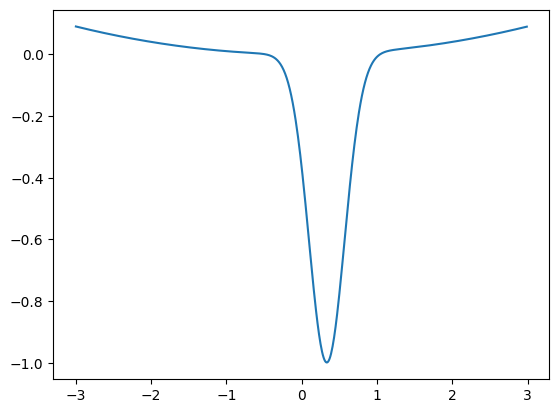

In [19]:
%matplotlib inline

from numpy import exp

def fun3(x):
    return - exp(-(3*x-1)**2)+ (x**2) / 100 


#PLOT SECTION

### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-3,3,0.01)
y = fun3(x)
plt.plot(x,y)
plt.show()
### END SOLUTION



In [20]:
#  *** AUTOGRADING SECTION ***
#
#  !!! FUNCTION SIGNATURES MUST BE LEFT UNCHANGED !!!
#
#  Each of your functions must return a value (@see docstring)
from numpy import exp

def fprime3(x):
    """
    Args:
        x (float) : the x value
    Returns:
        float. the first order derivative at x
    """    
    ### BEGIN SOLUTION ###
    return x/50 - (6 - 18*x)*exp(-(3*x - 1)**2)
    ### END SOLUTION


def fsec3(x):
    """
    Args:
        x (float) : the x value
    Returns:
        float. the second order derivative at x
    """
    ### BEGIN SOLUTION ###
    return -36*(3*x - 1)**2 * exp(-(3*x - 1)**2) + 1/50 + 18 * exp(-(3*x - 1)**2)
    ### END SOLUTION


# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited for your implementation
#  The autograder uses theses values when calling your optimization functions

hyper3 = {"gradient_descent":{"alpha0": 1.0,'decay':0.,'epsilon':0.00001},
          "newton"          :{'beta0':1.0,'decay':0. ,'epsilon':0.00001}}




# FEEL FREE TO ADD ANY OTHER OPTIONAL CODE HERE TO TEST YOUR IMPLEMENTATION.
# test against several initial conditions, several learning rates, several epsilon

# it will not be graded


In [21]:

### BEGIN HIDDEN TESTS
hyper3['gradient_descent']['alpha0'] = 0.001
hyper3['newton']['beta'] = 1.0
hyper3['newton']['decay'] = 0.01
hyper3['newton']['epsilon'] = 0.0001
### END HIDDEN TESTS
import math

#### TEST GRADIENT DESCENT #### (2pts)

assert fprime3(3) == 0.06

assert math.isclose(1/3,gradient_descent(6,fprime3,
                                           alpha0=hyper3['gradient_descent']['alpha0'],
                                           decay=hyper3['gradient_descent']['decay'],
                                           epsilon=hyper3['gradient_descent']['epsilon']),abs_tol=0.001) 


### BEGIN HIDDEN TESTS
xinit = [-7,-5,-3,-1,1,3,5,7]

for x0 in xinit:
    assert math.isclose(1/3,gradient_descent(x0,fprime3,
                                                 alpha0=hyper3['gradient_descent']['alpha0'],
                                                 decay=hyper3['gradient_descent']['decay'],
                                                 epsilon=hyper3['gradient_descent']['epsilon']),abs_tol=0.001) 
### END HIDDEN TESTS




In [23]:
#### TEST NEWTON #### (2pts)

assert fsec3(-2) == 0.02

assert math.isclose(1/3, newton(-4,fprime3,fsec3,
                                beta0 = hyper3['newton']['beta0'],
                                decay = hyper3['newton']['decay'],
                                epsilon=hyper3['newton']['epsilon']),abs_tol=0.001)

### BEGIN HIDDEN TESTS
for x0 in xinit:
    assert math.isclose(1/3,newton(x0,fprime3,fsec3,
                                   beta0 = hyper3['newton']['beta0'],
                                   decay = hyper3['newton']['decay'],
                                   epsilon=hyper3['gradient_descent']['epsilon']),abs_tol=0.001) 
### END HIDDEN TESTS

**Free content and comments section**: 
 - What is the analytical solution ? how did you compute it ? with sympy ? with scipy.optimize.minimize ? 
 - What are the key properties of this function ? is it convex ? 
 - In case your solution is far from the exact solution can you explain why ? In case both algorithms return different solutions, explain why.
 - how did you tune alpha, epsilon ?
 - ...

---

## Exercise 4

For the function $f(x_1,x_2) = \sum_{i=1}^2 x_i^4 - 16x_i^2 + 5 x_i$. 
   1. Plot the function for $x_1 \in [-5,5]$ and $x_2 \in [-5,5]$
   2. Compute the gradient
   3. Compute the hessian
   4. Optimize the function with gradient descent. 
   5. Optimize the function with the newton method



In [17]:
%matplotlib inline

def fun4(x):
    return np.sum( x[i]**4 - 16*x[i]**2 + 5*x[i]  for i in [0,1] )

# PLOT SECTION

### BEGIN SOLUTION

pass
#todo

### END SOLUTION


In [24]:
#  *** AUTOGRADING SECTION ***
#
#  !!! FUNCTION SIGNATURES MUST BE LEFT UNCHANGED !!!
#
#  Each of your functions must return a value (@see docstring)
from numpy.linalg import inv,norm

def grad4(x):
    """
    Args:
        x (numpy.array) : the x value
    Returns:
        numpy.array. The gradient vector at x
    """    
    ### BEGIN SOLUTION ###
    return np.array([4*x[0]**3 - 32*x[0] + 5,4*x[1]**3 - 32*x[1] + 5])
    ### END SOLUTION ############

def hess4(x):
    """
    Args:
        x (numpy.array) : the x value
    Returns:
        numpy.array. The hessian matrix at x
    """
    
    ### BEGIN SOLUTION ###
    return np.array([[4*(3*x[0]**2 - 8),0],[0,4*(3*x[1]**2 - 8)]])
    ### END SOLUTION #############



# It is strongly advised to output intermediate results during optimisation such as:
#  - the successive values of the iterates.
#  - the successive values of alpha or beta at each iteration in case alpha is non constant in your implementation.
#  - the current distance from the theoretical solution you computed analytically and the current iterate.

################## NOTE #######################################################
# For some exercises it may be useful to use a learning rate scheduler for the newton method: it may help convergence.
# @see https://en.wikipedia.org/wiki/Learning_rate
###############################################################################

def gradient_descent_mv(x0,grad,alpha0=1.0,decay=0.0,epsilon=0.001):
    """
    Args:
        x0   (numpy.array) : the initial iterate
        grad  (functional) : the gradient function
        alpha0             : the initial learning rate
        epsilon            : the precision of the solution
    Returns:
        numpy.array. The value of the last iterate
    """
    ### BEGIN SOLUTION
    x  = x0
    dx = grad(x)
    t  = 0.
    alpha = alpha0
    while norm(dx) > epsilon:
        alpha = alpha/(1+decay*t)
        x     = x - alpha * dx 
        dx    = grad(x)
        t     = t+1
    return x
    ### END SOLUTION 


# It is strongly advised to output intermediate results during optimisation such as:
#  - the successive values of the iterates.
#  - the successive values of alpha or beta at each iteration in case alpha is non constant in your implementation.
#  - the current distance from the theoretical solution you computed analytically and the current iterate.

################## NOTE #######################################################
# For some exercises it may be useful to use a learning rate scheduler for the newton method: it may help convergence.
# @see https://en.wikipedia.org/wiki/Learning_rate
###############################################################################

def newton_mv(x0,grad,hessian,beta0=1.,decay=0.0,epsilon=0.00001):
    """
    Args:
        x0   (numpy.array) : the initial iterate
        grad  (functional) : the gradient function
        hessian(functional): the hessian function
        epsilon            : the precision of the solution
    Returns:
        numpy.array. The value of the last iterate
    
    """
    ### BEGIN SOLUTION ###
    x  = x0
    dx = grad(x)
    t  = 0
    while norm(dx) > epsilon:
        beta  = beta0*np.exp(-decay*t)
        alpha = inv(hessian(x))
        x     = x - beta*alpha @ dx 
        dx    = grad(x)
        t    += 1
    return x
    ### END SOLUTION ##


# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited for your implementation
#  The autograder uses theses values when calling your optimization functions

hyper4 = {"gradient_descent":{"alpha0": 1.0,'decay':0.,'epsilon':0.00001},
          "newton"          :{'beta0':1.0,'decay':0. ,'epsilon':0.00001}}

# FEEL FREE TO ADD ANY OTHER OPTIONAL CODE HERE TO TEST YOUR IMPLEMENTATION.
# e.g test with scipy.optimize.minimize
# it will not be graded

In [26]:
### BEGIN HIDDEN TESTS
hyper4['gradient_descent']['alpha0'] = 0.002
### END HIDDEN TESTS

### GRADIENT DESCENT TEST SECTION (2pts)

solution_set = np.array([ [-2.90353404,  2.74680293], [2.74680289, 2.74680289], [ 2.74680277, -2.90353403],[-2.90353403 , 2.74680277],[-2.90353403 , -2.90353403]])

x0 = np.array([-10,10])
sol = gradient_descent_mv(x0,grad4,alpha0 = hyper4['gradient_descent']['alpha0'], epsilon=hyper4['gradient_descent']['epsilon'])
assert any(np.isclose(s,sol,atol=0.000001).all() for s in solution_set)
### BEGIN HIDDEN TESTS 
inits = np.array([ [-2,2], [-2,-2],[2,2],[2,-2] ])*3
for x0 in inits:
    sol = gradient_descent_mv(x0,grad4,alpha0 = hyper4['gradient_descent']['alpha0'], epsilon=hyper4['gradient_descent']['epsilon'])
    assert any(np.isclose(s,sol,atol=0.00001).all() for s in solution_set)
### END HIDDEN TESTS



In [27]:
### NEWTON TEST SECTION (2pts)

sol = newton_mv(x0,grad4,hess4, beta0 = hyper4['newton']['beta0'], decay = hyper4['newton']['decay'],epsilon=hyper4['newton']['epsilon'])
assert any(np.isclose(s,sol,atol=0.000001).all() for s in solution_set)

### BEGIN HIDDEN TESTS 

for x0 in inits:
    sol = newton_mv(x0,grad4,hess4, beta0 = hyper4['newton']['beta0'], decay = hyper4['newton']['decay'],epsilon=hyper4['newton']['epsilon'])
    assert any(np.isclose(s,sol,atol=0.00001).all() for s in solution_set)
### END HIDDEN TESTS

**Free content and comments section**: 
 - What is the exact solution ? how did you compute it ? 
 - What are the key properties of this function ? is it convex ? how many solutions can you identify ?
 - In case your solution is far from the exact solution can you explain why ? In case both algorithms return different solutions, explain why.
 - how did you tune alpha, beta epsilon ?

 - ...

---

## Exercise 5

For the function  $f(x_1,x_2) = (1-x_1)^2 + 100 (x_2-x_1^2)^2$ 

   1. Plot the function for $x_1 \in [-2,2]$ and $x_2 \in [-2,2]$
   2. Compute the gradient
   3. Compute the hessian
   4. Optimize the function with gradient descent. 
   5. Optimize the function with the newton method



In [38]:
%matplotlib inline

def fun5(x):
    return (1-x[0])**2 + 100 * (x[1]-x[0]**2)**2


# PLOT SECTION

### BEGIN SOLUTION
pass
### END SOLUTION



In [40]:
#  *** AUTOGRADING SECTION ***
#
#  !!! FUNCTION SIGNATURES MUST BE LEFT UNCHANGED !!!
#
#  Each of your functions must return a value (@see docstring)

def grad5(x):
    """
    Args:
        x (numpy.array) : the x value
    Returns:
        numpy.array. The gradient vector at x
    """
    ### BEGIN SOLUTION ###
    return np.array([2*x[0] - 2 - 400 * x[0] * (x[1] - x[0]**2), 200 * (x[1] -  x[0]**2)])
    ### END SOLUTION


def hess5(x):
    """
    Args:
        x (numpy.array) : the x value
    Returns:
        numpy.array. The hessian matrix at x
    """
    ### BEGIN SOLUTION ###
    return np.array([[2 * (600*x[0]**2 - 200*x[1] + 1),-400*x[0]],[-400*x[0],200]])
    ### END SOLUTION


# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited for your implementation
#  The autograder uses theses values when calling your optimization functions

hyper5 = {"gradient_descent":{"alpha0": 1.0,'decay':0.,'epsilon':0.00001},
          "newton"          :{'beta0':1.0,'decay':0. ,'epsilon':0.00001}}


# FEEL FREE TO ADD ANY OTHER OPTIONAL CODE HERE TO TEST YOUR IMPLEMENTATION.
# it will not be graded



In [57]:
### BEGIN HIDDEN TESTS
hyper5['gradient_descent']['alpha0'] = 0.0001
hyper5['gradient_descent']['decay'] = 0.0
### END HIDDEN TESTS


######### GRADIENT DESCENT TEST (2pts)

x0  = np.array([3,-3])
rsol = np.array([1,1])

sol = gradient_descent_mv(x0,grad5,alpha0 = hyper5['gradient_descent']['alpha0'], decay= hyper5['gradient_descent']['decay'], epsilon=hyper5['gradient_descent']['epsilon'])
assert np.isclose(rsol,sol,atol=0.0001).all()


### BEGIN HIDDEN TESTS
inits = np.array([ [-2,2], [-2,-2],[2,2],[2,-2] ])*3
for x0 in inits:
    sol = gradient_descent_mv(x0,grad5,alpha0 = hyper5['gradient_descent']['alpha0'], decay= hyper5['gradient_descent']['decay'], epsilon=hyper5['gradient_descent']['epsilon'])
    assert np.isclose(rsol,sol,atol=0.0001).all()
### END HIDDEN TESTS




In [ ]:
######### NEWTON TEST (2pts)

sol = newton_mv(x0,grad5,hess5,beta0 = hyper5['newton']['beta0'], decay=hyper5['newton']['decay'], epsilon=hyper5['newton']['epsilon'])
assert np.isclose(rsol,sol,atol=0.000001).all()

### BEGIN HIDDEN TESTS    
for x0 in inits:
    sol = newton_mv(x0,grad5,hess5,beta0 = hyper5['newton']['beta0'], decay=hyper5['newton']['decay'], epsilon=hyper5['newton']['epsilon'])
    assert np.isclose(rsol,sol,atol=0.000001).all()
### END HIDDEN TESTS


**Free content and comments section**: 
 - What is the exact solution ? how did you compute it ? with scipy.optimize.minimize ? 
 - What are the key properties of this function ? is it convex ? 
 - In case your solution is far from the exact solution can you explain why ? In case both algorithms return different solutions, explain why.
 - how did you tune alpha, epsilon ?
 - ...

---

## Exercise 6

In this exercise we implement parameter estimation for the multivariate linear regression model on the `Iris` dataset. The first step if to preprocess the raw dataset in order to get a design matrix  $\mathbf{X}\in\mathbb{R}^{n\times k}$ with $n$ lines whose $k$ columns are predictors and a $\mathbf{y}$ vector
with reference values to be predicted. In matrix notation the sum of squares loss can be reformulated as:

$$
ssq_{\cal D}(\mathbf{p}) = \sum_{i=1}^n(\mathbf{X}\mathbf{p} - \mathbf{y})^2
$$


    
   1. Compute the gradient. To do so you may compute it analytically or take advantage of sympy. 
      The result can be expressed in matrix form as $\nabla ssq_{\cal D}(\mathbf{p}) = \mathbf{X}^\top (\mathbf{X}\mathbf{p} - \mathbf{y})$ 
   2. Compute the hessian.  To do so you may compute it analytically or take advantage of sympy.
      The result can be expressed in matrix form as $\mathbf{H}_{ssq_{\cal D}} (\mathbf{p}) = \mathbf{X}^\top \mathbf{X}$
   3. Optimize the function with gradient descent
   4. Optimize the function with the newton method


In [28]:
import pandas as pa


#PREPARE DATA SECTION
#grabs the full iris dataset from the sklearn library 

from sklearn import datasets
iris = datasets.load_iris()
print('Iris variable names',iris.feature_names)
iris = pa.DataFrame(data=iris.data, columns=iris.feature_names)

def do_data_matrix(iris_frame,x_colnames,y_colname,add_bias=True):
    """
    Creates a numpy matrix encoding the dataset.
    It converts a pandas dataframe to a couple (X,y) of numpy arrays 
    Args:
        iris_frame (pandas.DataFrame): the iris dataframe
        x_colnames (list) : list of strings, the predictor names
        y_colname   (str) : the name of the predicted variable
        add_bias    (bool): whether we add a bias to the model or not   
    Returns:
        (numpy.array,numpy.array). Tuple (X,y) the first element is a design matrix. 
                                   A matrix whose columns are x predictor variables with one row for each data line
                                   The second element is a vector with the y values of the predicted variable
    """
    X             = iris_frame[x_colnames].to_numpy()
    nlines, ncols = X.shape
    if add_bias:
        X = np.concatenate([X,np.ones((nlines,1))],axis=1)
        
    return X, iris_frame[y_colname].to_numpy()



Iris variable names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
import numpy as np
 
#  *** AUTOGRADING SECTION ***
#
#  !!! FUNCTION SIGNATURES MUST BE LEFT UNCHANGED !!!
#
#  Each of your functions must return a value (@see docstring)


def leastsq_loss(params,X,yref):
    """
    Args:
        params         (numpy.array): the vector of variables (linear regression parameters)
        X              (numpy.array): the design matrix (columns are predictor variables)
        yref           (numpy.array): the vector of y values
    Returns:
        float. the sum of squares value for this dataset and the current value of the parameters
    """

    ### BEGIN SOLUTION ###
    
    yhat = X @ params
    ssq  = (yhat - yref)**2
    return np.sum(ssq)

    ### END SOLUTION ####


def gradient_lstsq(params,X,yref):
    """
    Args:
       params (numpy.array): a paremeter vector
        X     (numpy.array): the design matrix (columns are predictor variables)
        yref  (numpy.array): the vector of y values
    Returns:
        numpy.array. a gradient vector 
    """

    ### BEGIN SOLUTION ###    
    return X.T @ (X @ params - yref)
    ### END SOLUTION

    
def hessian_lstsq(params,X):
    """
    Args:
       params (numpy.array): a paremeter vector
       X      (numpy.array): the design matrix (columns are predictor variables)
    Returns:
        numpy.array. a hessian matrix 
        
    @note: for linear regression, the hessian is constant for a given dataset, 
    we keep the signature with params for homogeneity
    """
    ### BEGIN SOLUTION ###
    return X.T @ X
    ### END SOLUTION


    

# It is strongly advised to output intermediate results during optimisation such as:
#  - the current value of the loss
#  - the current value of the iterates
#  - for gradient descent, the successive values of alpha at each iteration in case alpha is non constant in your implementation.
# ...    

################## NOTE #######################################################
# For some exercises it may be useful to use a learning rate scheduler for the newton method: it may help convergence.
# @see https://en.wikipedia.org/wiki/Learning_rate
###############################################################################
    
from numpy.linalg import inv,norm   


def gradient_descent_lstsq(x0,loss_fnc,grad,alpha0,decay=0.0,epsilon=0.001):
    """
    Args:
        x0   (numpy.array) : the initial iterate
        grad  (functional) : the gradient function
        alpha0 (float)     : the initial learning rate
        decay (float)      : a decay parameter for the scheduler
        epsilon (float)    : the precision of the solution
    Returns:
        numpy.array. The value of the last iterate
    """
    ### BEGIN SOLUTION ###
    x  = x0
    dx = grad(x)
    alpha = alpha0
    t=0
    while norm(dx) > epsilon:
        alpha = alpha/(1+decay*t)
        x     = x - alpha * dx
        dx    = grad(x)
        t    +=1
    return x
    ### END SOLUTION

    
# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited for your implementation
#  The autograder uses these values when calling your optimization functions

hyper_lstsq = {"gradient_descent":{"alpha0": 1.0,'epsilon':0.01},
               "newton"          :{'epsilon':0.00001}}
    
    
def newton_lstsq(x0,loss_fnc,grad,hessian,beta0=1.,decay=0.,epsilon=0.0000001):
    """
    Args:
        x0   (numpy.array)  : the initial iterate
        loss_fnc(functional): the loss function
        grad  (functional)  : the gradient function
        hessian(functional) : the hessian function
        epsilon             : the precision of the solution
    Returns:
        numpy.array. The value of the last iterate
    
    """
    ### BEGIN SOLUTION ###
    x  = x0
    dx = grad(x)
    #print('loss (sum of squares)',loss_fnc(x))
    t  = 0
    while norm(dx) > epsilon:
        alpha = inv(hessian(x))
        beta  = beta0 * np.exp(-decay*t)
        x     = x - beta * alpha @ dx
        dx    = grad(x)
        t    += 1.
        #print('loss (sum of squares)',loss_fnc(x))
    return x
    ### END SOLUTION
    
    
    
def fit_lm(dataset,predictor_lst,predicted,optim_method,alpha0=0.1,beta0=0.1,decay=0,epsilon=0.001,add_bias=True):
    """
    Given a data matrix, returns the estimates of the parameters using least squares estimation.
    Optimisation is performed either with the Newton method or the gradient method.
    
    Args: 
        dataset (pandas.DataFrame) : a dataset
        predictor_lst        (list): a list of strings with the predictor variable names
        predicted             (str): the name of the predicted variable
        optim_method          (str): either 'grad_descent' or 'newton'
        epsilon             (float): epsilon value for the optimizer
    Returns :
        numpy.array: a vector with parameter estimates
    """
    ### BEGIN SOLUTION ###
    X, y = do_data_matrix(dataset,predictor_lst,predicted,add_bias=add_bias)
    nlines, nvars = X.shape
    if optim_method == 'newton':
        x0 = np.random.randn(nvars)
        return newton_lstsq(x0,lambda x: leastsq_loss(x,X,y),
                               lambda x: gradient_lstsq(x,X,y),
                               lambda x: hessian_lstsq(x,X),
                               epsilon=epsilon)
    elif optim_method == 'grad_descent':
        x0 = np.random.randn(nvars)
        return gradient_descent_lstsq(x0,
                                      lambda x: leastsq_loss(x,X,y),
                                      lambda x: gradient_lstsq(x,X,y),
                                      alpha0 = 0.0001,
                                      epsilon=epsilon)
    ### END SOLUTION   



# HYPERPARAMETERS
#  You may change the default hyperparameter values and set them to the values best suited for your implementation
#  The autograder uses theses values when calling your optimization functions

lr_params = {"gradient_descent":{"alpha0": 1.0,'decay':0.,'epsilon':0.00001},
             "newton"          :{'beta0':1.0,'decay':0. ,'epsilon':0.00001}}




In [16]:
### TEST LINEAR REGRESSION (5pts)

### BEGIN HIDDEN TESTS
np.random.seed(12345)
### END HIDDEN TESTS

sols = np.array([  0.22282854, -0.20726607,  0.52408311, -0.24030739 ])

result = fit_lm(iris,['sepal width (cm)','sepal length (cm)','petal length (cm)'],'petal width (cm)',
                alpha0  =  lr_params['gradient_descent']['alpha0'],
                decay   =  lr_params['gradient_descent']['decay'], 
                epsilon =  lr_params['gradient_descent']['epsilon'], 
                optim_method = 'grad_descent')
assert np.isclose(result,sols,atol=0.0001).all()


result = fit_lm(iris,['sepal width (cm)','sepal length (cm)','petal length (cm)'],'petal width (cm)',
                beta0  =  lr_params['newton']['beta0'],
                decay   =  lr_params['newton']['decay'], 
                epsilon =  lr_params['newton']['epsilon'], 
                optim_method = 'newton')
assert np.isclose(result,sols,atol=0.000001).all()
